## Importing required model

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv ("iris.csv")
df.head ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Univariate analysis

Text(0.65, 1.25, 'Iris dataset Univariate plot')

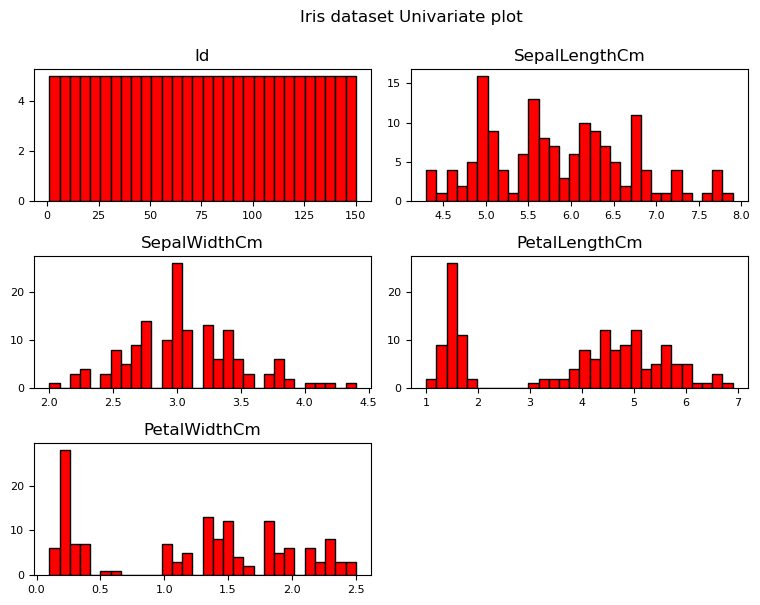

In [5]:
df.hist (bins = 30, color = "red", edgecolor = "black", linewidth = 1,
        xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout (rect = (0, 0, 1.2, 1.2))

plt.suptitle ("Iris dataset Univariate plot", x = 0.65, y = 1.25,
              fontsize = 12)

## Multivariate analysis

Text(0.5, 1.0, 'house price multivariate plot')

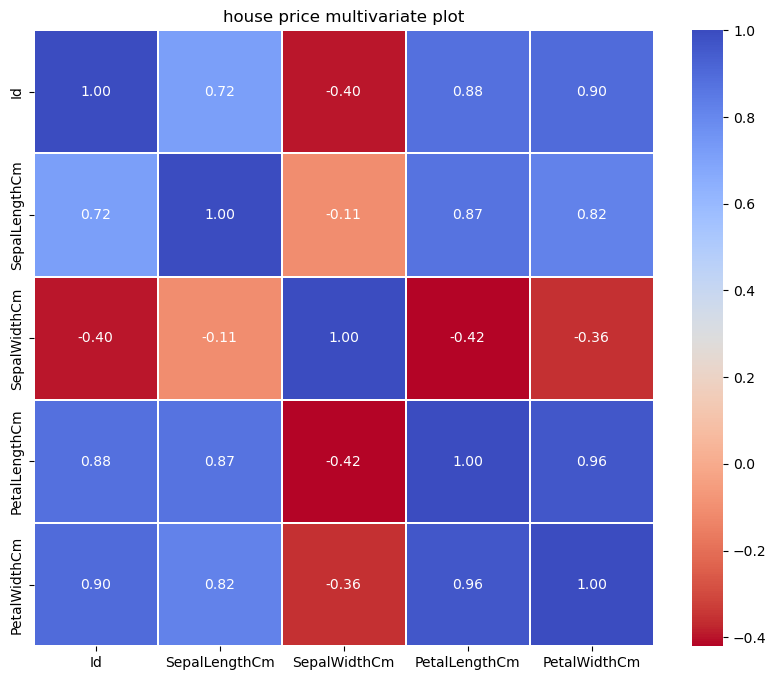

In [7]:
corr = df.corr ()
plt.figure (figsize = (10, 8))
sns.heatmap (corr, annot = True, fmt = ".2f", cmap = "coolwarm_r", linewidth = 0.2)
plt.title ("house price multivariate plot", fontsize = 12)

### Handling categorical variables (dependent variables--Species)

In [19]:
df["Species"] = LabelEncoder ().fit_transform(df[["Species"]])
df["Species"].unique()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2], dtype=int64)

## splitting our dataset

In [20]:
# defining our dependent and independent variables
x = df.drop ("Species", axis = 1)
y = df["Species"]

# splitting our datset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.8, random_state = 42)

## modeling

In [25]:
model = LogisticRegression ().fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Predicting on test dataset

In [34]:
df_test = pd.DataFrame({"Actual_Species": y_test[:20], "Pred_Species": model.predict (x_test)[:20]})
df_test

,Actual_Species,Pred_Species
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1
